# Sign Language Alphabet Detection and Classification

1. Introduction
    - 1.1 Overview
    - 1.2 About the Data
    - 1.3 Purpose of this Project
2. Downloading the Data
    - 2.1 Downloading the Libraries
    - 2.2 Downloading the Training Images
    - 2.3 Downloading the Test Images
    - 2.4 Checking for Missing Data
3. Processing the Images
    - 3.1 Creating our X and our Y
    - 3.2 Scaling Our Images
    - 3.3 Reshaping Our Images
    - 3.4 Distribution of Labels
4. Viewing the Images
    - 4.1 Training Images
    - 4.2 Test Images
5. CNN Model
    - 5.1 Spliting Our Training Data
    - 5.2 Creating Our Model
    - 5.3 Training Our Model
6. Results
    - 6.1 Classification Report
    - 6.2 Brief Thoughts on Results
7. Conclusion
    - 7.1 Recap

# 1. Introduction

### 1.1 Overview

Artifical Intelligence is a tool that has the potential to make our lives easier and, in some cases, remove obstacles. For example, artifical intelligence could be used to take video feeds of people using sign language and translating the signs into words. This could help remove communication obstacles with sign lanuage users with their coworkers and personal relationships.

Such an application would consist of computer vision and natural language processing, but the first step would be to accurately detect and classify sign language signs using computer vision.

In this notebook we will be applying a convolutional neural network to classify a dataset of American Sign Language alphabet images. 

### 1.2 About the Data

The dataset consist of 27,455 training images and 7,172 test images. Each image is grayscaled and has a 28 x 28 pixel structure. Each images includes the label of which letter in the alphabet the image represents. There are 24 letters in this dataset, 'j' and 'z' are not included because they both involve motion.

### 1.3 Purpose of this Project

Our task will be to create a CNN model that can accuractly predict the alphabet letter for each image. I am setting out to achive an accuracy of at least 98%.

# 2. Downloading the Data

### 2.1 Downloading the Libraries

In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import random as rd

#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from PIL import Image

#for the CNN model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator

#setting seed for reproducability
from numpy.random import seed
seed(10)
tf.random.set_seed(20)

#for viewing filenames
import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input/.DS_Store
./input/american_sign_language.PNG
./input/amer_sign3.png
./input/amer_sign2.png
./input/sign-language-mnist/sign_mnist_test.csv
./input/sign-language-mnist/sign_mnist_train.csv


### 2.2 Downloading the Training Images

In [2]:
#downloading the training data
train = pd.read_csv("./input/sign-language-mnist/sign_mnist_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### 2.3 Downloading the Test Images

In [3]:
#downloading the test data
test = pd.read_csv("./input/sign-language-mnist/sign_mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


### 2.4 Checking for Missing Data

In [4]:
#summing the number of na in the training set for each column
print(sum(train.isna().sum()))

#summing the number of na in the test set for each column
print(sum(test.isna().sum()))

0
0


In [5]:
#summing the number of null values in the training set for each column
print(sum(train.isnull().sum()))

#summing the number of null values in the test set for each column
print(sum(test.isnull().sum()))

0
0


# 3. Processing the Images

### 3.1 Creating our X and our Y

The first column in the dataset is the labels. We will first separate the label and pixel data.

In [6]:
#creating our Y for the training data
Y_train = train["label"]

#creating our X for the training data
X_train = train.drop(labels = ["label"],axis = 1) 

Now we will do the same for the test data.

In [7]:
#creating our Y for the test data
Y_test = test["label"]

#creating our X for the training data
X_test = test.drop(labels = ["label"],axis = 1) 

### 3.2 Scaling Our Images

Next, we need to scale the data from 0-255 to 0-1. This will make things easier to work with the neural network because it will allow the nn to converge faster.

In [8]:
#converting the range of the pixel data from 0-255 to 0-1
X_train = X_train / 255.0

X_test = X_test / 255.0

### 3.3 Reshaping Our Images

The images will need to be reshaped in order feed into our model. Our images will be 28x28 and, since we will be using grayscale, the color channel will be 1.

In [9]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print(X_train.shape)
print(X_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


### 3.4 Distribution of Labels

In [10]:
#creating an interactive bar graph that shows the distrubition of labels within the training set
fig = px.histogram(train, 
                   x='label', 
                   color = 'label',
                   title="Distrubition of Labels in the Training Set",
                   width=700, height=500)
fig.show()

In [11]:
#creating an interactive bar graph that shows the distrubition of labels within the test set
fig = px.histogram(test, 
                   x='label',
                   color = 'label',
                   title="Distrubition of Labels in the Test Set",
                   width=700, height=500)
fig.show()

Our training images are fairly equally distrubited but unfortunatly our test images are not distrubited equally. It shouldn't prevent us from coming up with an accurate prediction but it is something to keep an eye on.

The label 9 and 25 columns are empty because they represent j and z and are not in the dataset.

# 4. Viewing the Images

### 4.1 Training Images

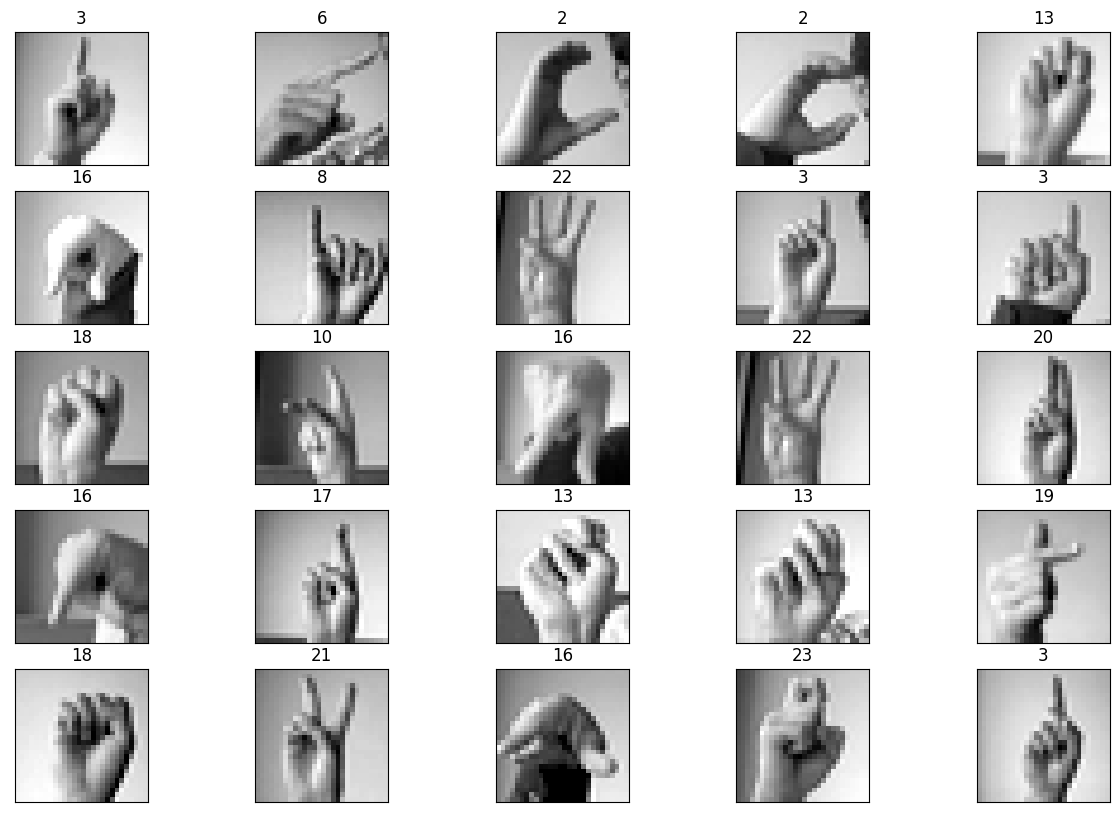

In [12]:
#creating a 5x5 grid of the first 25 photos in the training images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(Y_train[i])
plt.show()

### 4.2 Test Images

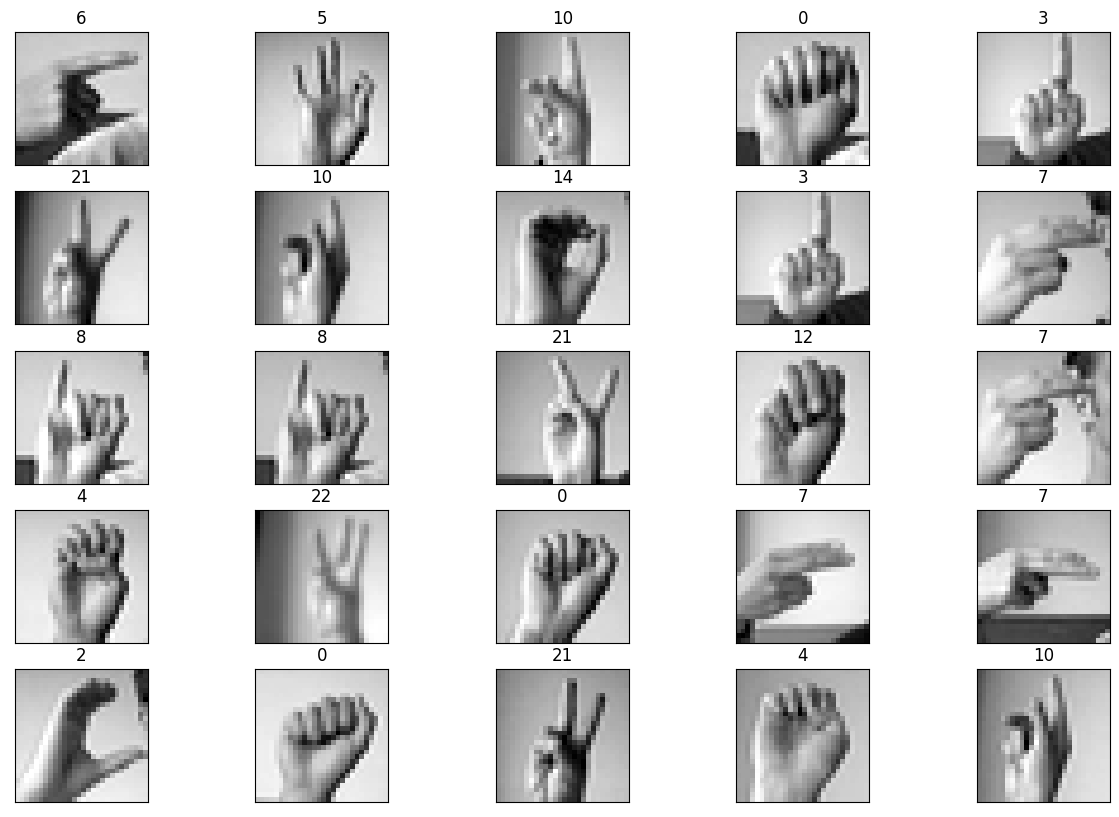

In [13]:
#creating a 5x5 grid of the first 25 photos in the test images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(Y_test[i])
plt.show()

# 5. CNN Model

### 5.1 Spliting Our Training Data

We will take the images in the Train set and we will split them into training and validation sets. While training the model, we will use the new train set to train the model and the validation set to validate the results.

Once the model has been trained, we will take the pixel data from the test set and predict the labels for each test image. 

Then we will evaluate the model's performance by looking at a classification report.

In [14]:
#spliting training images into the images we will use for training the model and validating the model
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state=7)

In [15]:
#showing the shapes of our train, validate, and test images
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(19218, 28, 28, 1)
(19218,)
(8237, 28, 28, 1)
(8237,)
(7172, 28, 28, 1)
(7172,)


### 5.2 Creating Our Model

In [16]:
#creating our CNN model
model = keras.Sequential([
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax"),
])

In [17]:
#compiling the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### 5.3 Training Our Model

In [18]:
#Training the model
history = model.fit(
    x = X_train,
    y = Y_train,
    validation_data= (X_val,Y_val),
    batch_size = 128,
    epochs=50,
    verbose=2,
)

Epoch 1/50


2022-11-24 14:47:06.850235: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


151/151 - 5s - loss: 3.2419 - accuracy: 0.0732 - val_loss: 3.2948 - val_accuracy: 0.0357 - 5s/epoch - 36ms/step
Epoch 2/50
151/151 - 5s - loss: 2.5820 - accuracy: 0.2126 - val_loss: 2.8440 - val_accuracy: 0.1752 - 5s/epoch - 33ms/step
Epoch 3/50
151/151 - 5s - loss: 1.6518 - accuracy: 0.4426 - val_loss: 1.2620 - val_accuracy: 0.6007 - 5s/epoch - 32ms/step
Epoch 4/50
151/151 - 5s - loss: 1.0839 - accuracy: 0.6217 - val_loss: 0.6038 - val_accuracy: 0.8219 - 5s/epoch - 32ms/step
Epoch 5/50
151/151 - 5s - loss: 0.7673 - accuracy: 0.7356 - val_loss: 0.3736 - val_accuracy: 0.8978 - 5s/epoch - 32ms/step
Epoch 6/50
151/151 - 5s - loss: 0.5793 - accuracy: 0.7969 - val_loss: 0.2188 - val_accuracy: 0.9602 - 5s/epoch - 32ms/step
Epoch 7/50
151/151 - 5s - loss: 0.4473 - accuracy: 0.8428 - val_loss: 0.1553 - val_accuracy: 0.9749 - 5s/epoch - 32ms/step
Epoch 8/50
151/151 - 5s - loss: 0.3439 - accuracy: 0.8824 - val_loss: 0.0876 - val_accuracy: 0.9891 - 5s/epoch - 32ms/step
Epoch 9/50
151/151 - 5s - l

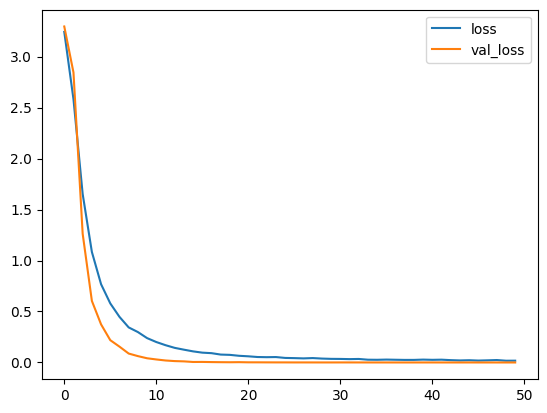

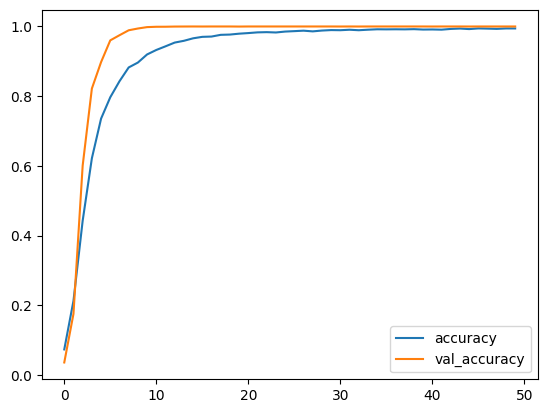

In [19]:
#Viewing the training results
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

# 6. Results

### 6.1 Classification Report

In [20]:
#creating our predictions using the test pixel values
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis = 1)

#creating a report that show how our predictions compare with actual values
print(classification_report(Y_test, predictions))

225/225 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       1.00      1.00      1.00       348
           7       1.00      1.00      1.00       436
           8       1.00      1.00      1.00       288
          10       1.00      1.00      1.00       331
          11       1.00      1.00      1.00       209
          12       0.99      1.00      0.99       394
          13       1.00      0.98      0.99       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       1.00   

### 6.2 Brief Thoughts on Results

We were able to get an accuracy of 100% according to the classification report. 
The biggest take away for me was that the BatchNormalization and Dropout layers really helped with increasing the accuracy. The Dropout layers seemed to really smooth out the training results as well.

# 7. Conclusion

### 7.1 Recap

We were able to take images of the American Sign Lanuage alphabet and use a CNN model to learn the alphabet and make predictions on new images. When training our CNN model, the training results were 99% accuracy but the validation results had an accuracy of 100%. When applying the CNN model on our test images we got the result of 100% accuracy.